In [15]:
import numpy as np  # noqa
import pandas as pd
import plotly.express as px
import seaborn as sns
from matplotlib import pyplot as plt

In [16]:
df = pd.read_csv("../data/chapter_1.csv", delimiter=";")
df.head(5)

,period,x_demand,y_produced,z_price
0,2013,35,31,3.0
1,2014,39,34,3.5
2,2015,40,35,4.7
3,2016,47,37,5.4
4,2017,49,37,7.8


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   period      10 non-null     int64  
 1   x_demand    10 non-null     int64  
 2   y_produced  10 non-null     int64  
 3   z_price     10 non-null     float64
dtypes: float64(1), int64(3)
memory usage: 448.0 bytes


In [18]:
df.describe()

,period,x_demand,y_produced,z_price
count,10.00000,10.000000,10.000000,10.000000
mean,2017.50000,47.800000,33.500000,18.130000
std,3.02765,7.405704,4.275252,18.956386
min,2013.00000,35.000000,26.000000,3.000000
25%,2015.25000,41.750000,31.750000,4.875000
50%,2017.50000,49.500000,34.500000,9.650000
75%,2019.75000,53.750000,36.500000,25.000000
max,2022.00000,56.000000,39.000000,57.800000


# Task 3
---
Рассчитайте (пользуясь таблицей 2.1. на листе 2) линейные коэффициенты корреляции между показателями x и y,
а также между показателями x и z. Сделайте выводы о том, какая связь более сильная.
Тот показатель (y или z), у которого связь с показателем x более сильная, выберите для дальнейших расчетов.

<Axes: title={'center': 'Linear correlation'}>

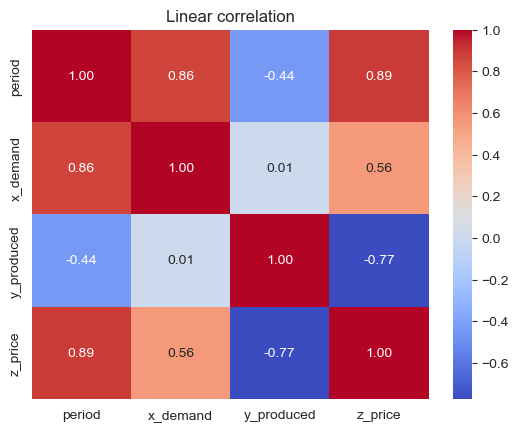

In [19]:
plt.title("Linear correlation")
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")

In [20]:
np.corrcoef(df.x_demand, df.y_produced)


array([[1.        , 0.01403749],
       [0.01403749, 1.        ]])

In [21]:
np.corrcoef(df.x_demand, df.z_price)


array([[1.        , 0.55518605],
       [0.55518605, 1.        ]])

In [22]:
x_demand_y_produced = px.scatter(
    df,
    x=df.x_demand,
    y=df.y_produced,
    trendline="lowess",
    trendline_options=dict(frac=0.1),
)
x_demand_y_produced.show()

x_demand_z_price = px.scatter(
    df,
    x=df.x_demand,
    y=df.z_price,
    trendline="lowess",
    trendline_options=dict(frac=0.1),
)
x_demand_z_price.show()

# Task 4
---
Сделайте прогноз показателя x по двум вариантам уравнений тренда (линейному и квадратичному).
Для расчета параметров уравнений тренда пользуйтесь вспомогательной таблицей на листе 3.
Рассчитайте ошибки аппроксимации и сделайте вывод о том, какой прогноз более достоверен.

### Linear trend vs Quadratic trend

In [ ]:
import numpy as np
import plotly.graph_objects as go

period = df['period']
x_demand = df['x_demand']

linear_coefficients = np.polyfit(period, x_demand, 1)
linear_equation = np.poly1d(linear_coefficients)
forecast_linear = linear_equation(period)
linear_error = np.abs(x_demand - forecast_linear)
linear_mean_error = np.mean(linear_error)

quadratic_coefficients = np.polyfit(period, x_demand, 2)
quadratic_equation = np.poly1d(quadratic_coefficients)
forecast_quadratic = quadratic_equation(period)
quadratic_error = np.abs(x_demand - forecast_quadratic)
quadratic_mean_error = np.mean(quadratic_error)

fig = go.Figure()
fig.add_trace(go.Scatter(x=period, y=x_demand, name='Actual'))
fig.add_trace(go.Scatter(x=period, y=forecast_linear, name='Linear'))
fig.add_trace(go.Scatter(x=period, y=forecast_quadratic, name='Quadratic'))
fig.update_layout(title='x_demand Forecast', xaxis_title='Period', yaxis_title='x_demand')

fig.show()

print('Mean Approximation Error (Linear):', linear_mean_error)
print('Mean Approximation Error (Quadratic):', quadratic_mean_error)


# Task 5
---
Рассчитайте параметры уравнения парной линейной регрессии `x = k0 + k1 * z`, выражающей зависимость между показателем x и z (связь показателя z более сильная).
Рассчитайте ошибку аппроксимации и индекс детерминации.
Сделайте вывод о том, насколько хорошо построенное уравнение отражает существующую зависимость.

In [ ]:
import numpy as np
import statsmodels.api as sm

x_demand = df['x_demand']
z_price = df['z_price']

z_price_with_constant = sm.add_constant(z_price)

model = sm.OLS(x_demand, z_price_with_constant)
results = model.fit()

intercept = results.params[0]
slope = results.params[1]

predicted_x_demand = intercept + slope * z_price
approximation_error = np.abs(x_demand - predicted_x_demand)
approximation_mean_error = np.mean(approximation_error)

r_squared = results.rsquared

print('Intercept:', intercept)
print('Slope:', slope)
print('Mean Approximation Error:', approximation_mean_error)
print('R-squared:', r_squared)

fig = go.Figure()
fig.add_trace(go.Scatter(x=z_price, y=x_demand, mode='markers', name='Actual x_demand'))
fig.add_trace(go.Scatter(x=z_price, y=predicted_x_demand, mode='lines', name='Predicted x_demand'))
fig.update_layout(title='Actual and Predicted x_demand',
                  xaxis_title='z_price',
                  yaxis_title='x_demand')
fig.show()

# Task 6
---
Выполните прогноз показателя, выбранного в Task 3, по любому из уравнений тренда.
Затем подставьте полученное прогнозное значение в уравнение регрессии между этим показателем и показателем x
и рассчитайте прогноз спроса по уравнению регрессии.

In [ ]:

import numpy as np
import plotly.graph_objects as go

period = df['period']
z_price = df['z_price']

quadratic_trend_coefficients = np.polyfit(period, z_price, 2)
quadratic_trend_equation = np.poly1d(quadratic_trend_coefficients)

forecast_period = np.arange(2013, 2023)
forecasted_z_price = quadratic_trend_equation(forecast_period)

fig = go.Figure()
fig.add_trace(go.Scatter(x=period, y=z_price, name='Actual z_price', mode='markers'))
fig.add_trace(go.Scatter(x=forecast_period, y=forecasted_z_price, name='Forecast (Quadratic Trend)'))

fig.update_layout(title='Forecasted z_price',
                  xaxis_title='Period',
                  yaxis_title='z_price')
fig.show()

approximation_error = np.abs(z_price - quadratic_trend_equation(period))
approximation_mean_error = np.mean(approximation_error)

print('Mean Approximation Errors:', approximation_mean_error)
print('forecasted_z_price', forecasted_z_price)

In [ ]:
intercept = forecasted_z_price
slope = slope

predicted_x_demand = intercept + slope * z_price
approximation_error = np.abs(x_demand - predicted_x_demand)
approximation_mean_error = np.mean(approximation_error)

r_squared = results.rsquared

print('Intercept:', intercept)
print('Slope:', slope)
print('Mean Approximation Error:', approximation_mean_error)
print('R-squared:', r_squared)

fig = go.Figure()
fig.add_trace(go.Scatter(x=z_price, y=x_demand, mode='markers', name='Actual x_demand'))
fig.add_trace(go.Scatter(x=z_price, y=predicted_x_demand, mode='lines', name='Predicted x_demand'))

fig.update_layout(title='Actual and Predicted x_demand',
                  xaxis_title='z_price',
                  yaxis_title='x_demand')
fig.show()